# Statistical Analysis of Alpha Diversity vs. Metadata Feature

In [53]:
import pandas as pd
from IPython.display import display, HTML
from scipy.stats import kruskal
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import numpy as np

Read in local copies of American Gut Project metadata and precomputed alpha diversity calculations by sample id. Only specific features will be analyzed in this analysis.

In [2]:
# read local csvs
alpha_diversity = pd.read_csv(r'C:\Users\bwesterber\Downloads\alpha_diversity.csv')
agp_only_meta = pd.read_csv(r'C:\Users\bwesterber\Downloads\agp_only_meta.csv')

# select only fecal samples
agp_only_meta = agp_only_meta[agp_only_meta['env_material'] == 'feces']

# select categories for analysis from AGP metadata
features = ['sample_id', 'age_cat', 'antibiotic_history', 'prepared_meals_frequency', 'race', 'salted_snacks_frequency', 
               'sugary_sweets_frequency', 'diabetes_type', 'flossing_frequency']

agp_only_meta = agp_only_meta[features]

# join on sample_id
df = agp_only_meta.merge(alpha_diversity, how = 'inner', on = 'sample_id')

C:\Users\bwesterber\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (25,28,29,30,31,63,71,75,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,167,168,169,170,171,172,173,174,175,176,182,187,190,191,192,204,225,235,238,248,249,250,262,284,285,286,287,288,289,292,293,294,295,296,297,298,299,300,301,302,303,309,316) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Add in helping functions for generating distributions for each category, calculating the test statistic, and plotting the results.

In [59]:
# plotting and test functions

def generate_alpha_distributions(feature):
    unique_features = df[feature].unique()
    distributions = []
    for unique_feature in unique_features:
        distributions.append(df['observed_otus'][df[feature] == unique_feature].values)
    return unique_features, distributions

def test_significance_kruskal(feature, data, alpha):
    statistic, p_value = kruskal(*[list(x) for x in data])
    return statistic, p_value

def calc_effect_size():
    #TODO
    return

def run_posthoc_dunn(unique_features, distributions):
    post_hoc = sp.posthoc_dunn(distributions, unique_features, p_adjust = 'bonferroni')
    post_hoc = pd.DataFrame(post_hoc)

    post_hoc.columns = unique_features
    post_hoc.index = unique_features
    post_hoc = post_hoc.stack().reset_index()

    post_hoc.columns = ['A', 'B', 'P-value']
    post_hoc = post_hoc[(post_hoc['P-value'] < 0.05) & (post_hoc['P-value'] > 0)].drop_duplicates('P-value')
    return post_hoc

def plot_distributions(feature, unique_features, distributions, p_value):
    fig = plt.figure(figsize = (12, 9))
    plt.boxplot(distributions, labels = unique_features, showcaps = True, showbox = True)
    plt.title('Alpha Diversity by {} (p = {})'.format(feature, p_value, 'E'))
    plt.ylabel('Alpha Diversity (Observed OTUs)')
    plt.xlabel('{}'.format(feature))
    plt.xticks(rotation = 45)
    return

Evaluate each category. If alpha < 0.05 run a post hoc test to see what the significant differences are.

,A,B,P-value
2,60s,40s,9.315043e-06
3,60s,20s,2.233070e-18
4,60s,30s,1.994285e-08
6,60s,Not provided,1.728853e-26
7,60s,child,2.653114e-38
8,60s,teen,1.289243e-09
9,60s,baby,2.019850e-02
10,60s,Unspecified,8.794392e-05
13,50s,40s,3.162260e-02
14,50s,20s,7.258262e-13


,A,B,P-value
1,6 months,I have not taken antibiotics in the past year.,1.337307e-32
3,6 months,Year,3.836043e-03
9,I have not taken antibiotics in the past year.,Not provided,5.415334e-07
10,I have not taken antibiotics in the past year.,Year,1.272552e-14
11,I have not taken antibiotics in the past year.,Month,1.169620e-09
12,I have not taken antibiotics in the past year.,Week,1.149976e-13
26,Year,Week,1.064479e-03


,A,B,P-value
1,Never,Not provided,2.096292e-05
3,Never,Rarely (less than once/week),4.134892e-06
9,Not provided,Occasionally (1-2 times/week),1.966234e-05
11,Not provided,Regularly (3-5 times/week),3.033670e-11
17,Occasionally (1-2 times/week),Rarely (less than once/week),1.703989e-06
18,Occasionally (1-2 times/week),Regularly (3-5 times/week),1.198041e-02
25,Rarely (less than once/week),Regularly (3-5 times/week),2.615800e-12


,A,B,P-value
1,Caucasian,Not provided,1.144022e-04
3,Caucasian,Asian or Pacific Islander,6.683873e-44
4,Caucasian,Other,5.100562e-07
10,Not provided,Asian or Pacific Islander,1.903450e-06
17,Hispanic,Asian or Pacific Islander,3.091713e-09
25,Asian or Pacific Islander,Other,2.337519e-05
26,Asian or Pacific Islander,African American,3.665112e-04


,A,B,P-value
2,Rarely (less than once/week),Occasionally (1-2 times/week),7.373221e-04
4,Rarely (less than once/week),Regularly (3-5 times/week),1.177620e-11
6,Rarely (less than once/week),Daily,1.158510e-10
9,Not provided,Occasionally (1-2 times/week),7.326109e-05
11,Not provided,Regularly (3-5 times/week),2.789261e-13
13,Not provided,Daily,2.355552e-11
17,Occasionally (1-2 times/week),Never,8.922382e-04
18,Occasionally (1-2 times/week),Regularly (3-5 times/week),7.185934e-03
20,Occasionally (1-2 times/week),Daily,4.114436e-05
25,Never,Regularly (3-5 times/week),1.634103e-10


,A,B,P-value
1,Occasionally (1-2 times/week),Not provided,0.000083
9,Not provided,Rarely (less than once/week),0.040320
11,Not provided,Never,0.007228
13,Not provided,Unspecified,0.005364
20,Rarely (less than once/week),Unspecified,0.048980
27,Daily,Unspecified,0.025891
41,Regularly (3-5 times/week),Unspecified,0.031287


,A,B,P-value
1,Not provided,Unspecified,1.089504e-10
2,Not provided,Type II diabetes,1.431356e-04


,A,B,P-value
1,Daily,Never,1.232967e-15
5,Daily,Not provided,4.022100e-11
9,Never,Occasionally (1-2 times/week),2.623348e-06
10,Never,Regularly (3-5 times/week),8.961284e-07
11,Never,Rarely (a few times/month),1.014045e-08
19,Occasionally (1-2 times/week),Not provided,1.659216e-06
26,Regularly (3-5 times/week),Not provided,8.693115e-07
33,Rarely (a few times/month),Not provided,6.592209e-08


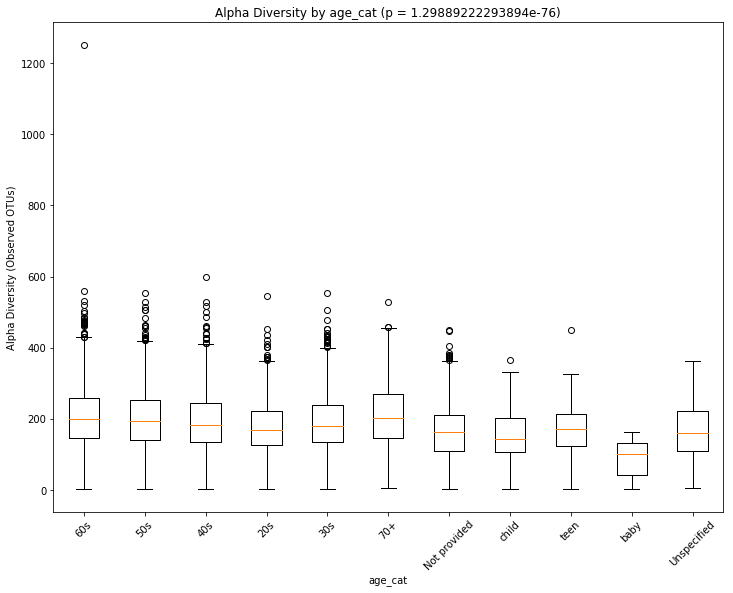

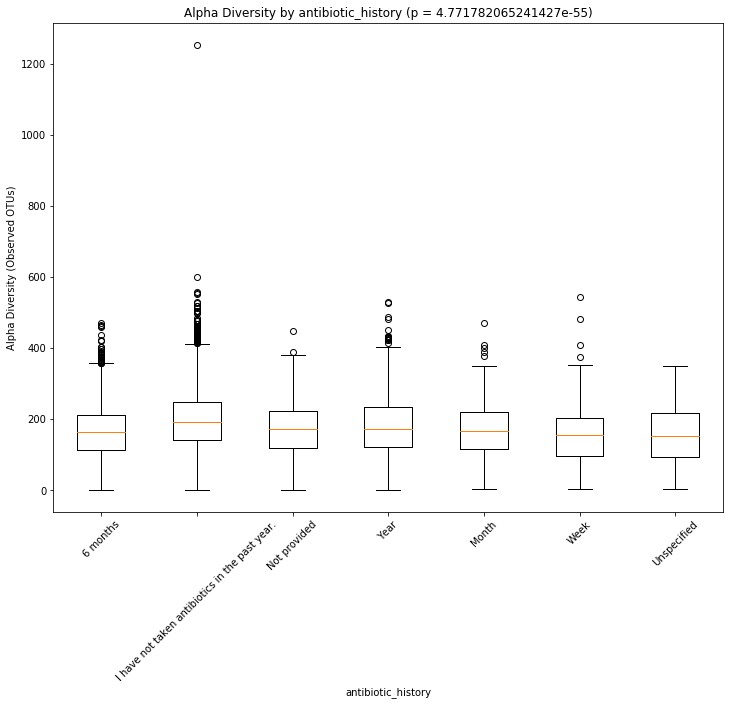

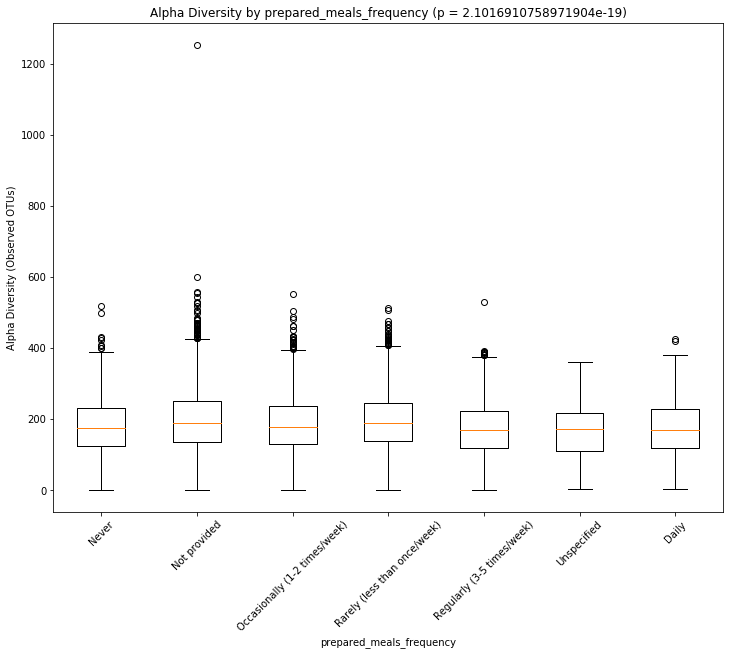

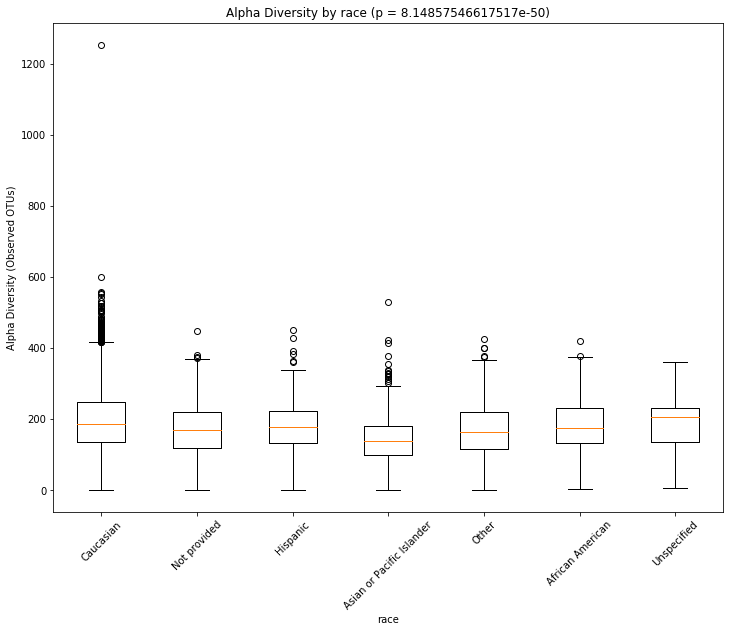

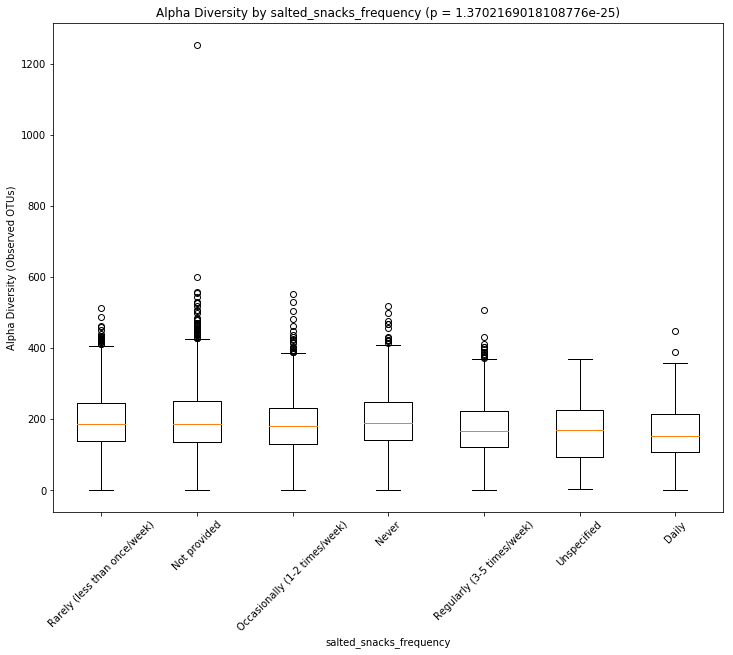

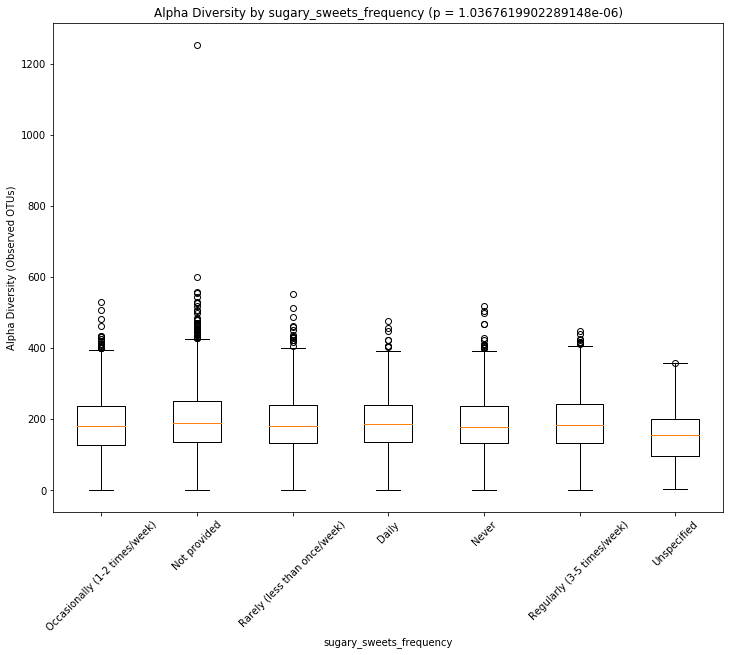

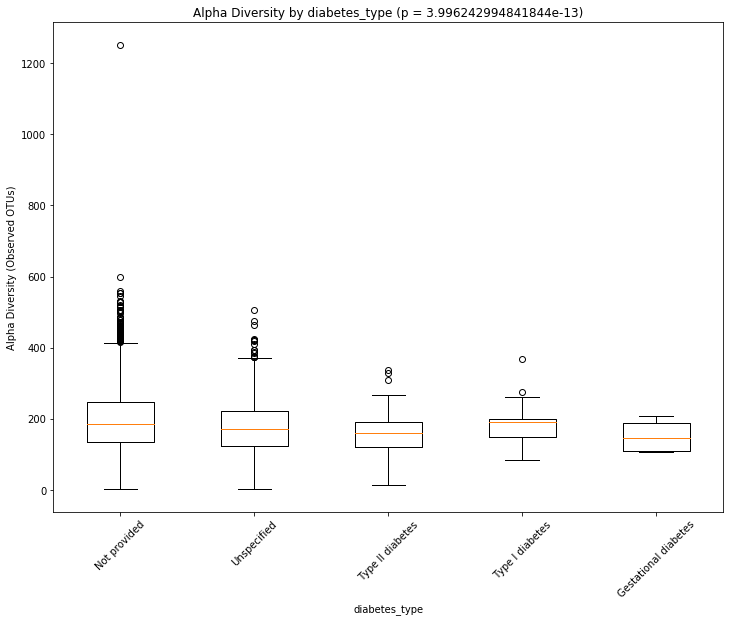

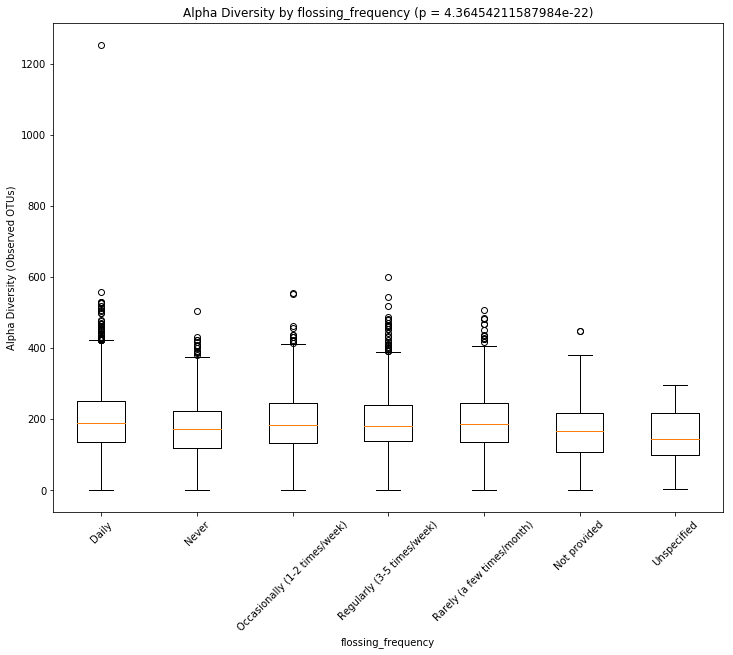

In [60]:
categories = ['age_cat', 'antibiotic_history', 'prepared_meals_frequency', 'race', 'salted_snacks_frequency', 
               'sugary_sweets_frequency', 'diabetes_type', 'flossing_frequency']

for category in categories:
    unique_features, distributions = generate_alpha_distributions(category)
    statistic, p_value = test_significance_kruskal(category, distributions, 0.05)
    post_hoc = run_posthoc_dunn(unique_features, distributions)
    plot_distributions(category, unique_features, distributions, p_value)   
    display(post_hoc)